<a href="https://colab.research.google.com/github/SalmanAhmad-code/Python-Programs/blob/main/Lab_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Task 1: Apply BFS and DFS on Trees and Graphs

from collections import deque, defaultdict

# ------------------ TREE EXAMPLE ------------------

# Sample Tree (Binary Tree)
#         1
#        / \
#       2   3
#      / \
#     4   5

tree = {
    1: [2, 3],
    2: [4, 5],
    3: [],
    4: [],
    5: []
}

def bfs_tree(start):
    visited = set()
    queue = deque([start])
    print("BFS on Tree:")
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            queue.extend(tree[node])
    print("\n")

def dfs_tree(start):
    visited = set()
    stack = [start]
    print("DFS on Tree:")
    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            stack.extend(reversed(tree[node]))
    print("\n")

bfs_tree(1)
dfs_tree(1)

# ------------------ GRAPH EXAMPLE ------------------

# Sample Graph
# 1 -- 2
# |  / |
# 3 -- 4

graph = {
    1: [2, 3],
    2: [1, 3, 4],
    3: [1, 2, 4],
    4: [2, 3]
}

def bfs_graph(start):
    visited = set()
    queue = deque([start])
    print("BFS on Graph:")
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)
    print("\n")

def dfs_graph(start):
    visited = set()
    stack = [start]
    print("DFS on Graph:")
    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            for neighbor in reversed(graph[node]):
                if neighbor not in visited:
                    stack.append(neighbor)
    print("\n")

bfs_graph(1)
dfs_graph(1)


BFS on Tree:
1 2 3 4 5 

DFS on Tree:
1 2 4 5 3 

BFS on Graph:
1 2 3 4 

DFS on Graph:
1 2 3 4 



Processing dataset of size 1000...
Processing dataset of size 40000...
Processing dataset of size 80000...
Processing dataset of size 200000...
Processing dataset of size 1000000...

Search Performance Table:
      Size     Goal  BFS_Time  DFS_Time
0     1000     1555  0.000160  0.000210
1    40000    79528  0.021974  0.016046
2    80000   159507  0.049427  0.030997
3   200000   399569  0.093031  0.069110
4  1000000  1999557  0.126614  0.278719


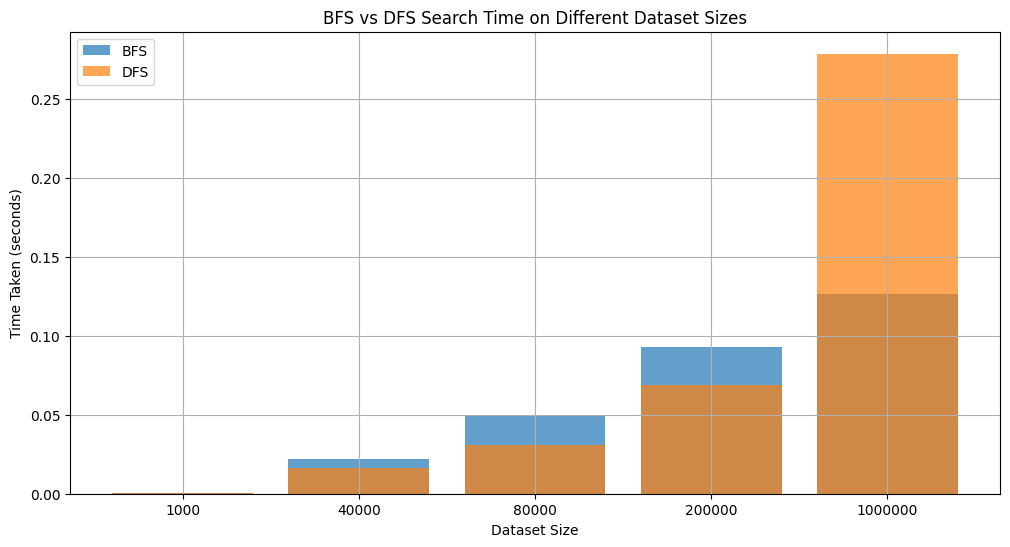

In [17]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

# Tree Node Definition
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Build a balanced BST from a sorted list
def build_bst(sorted_list):
    if not sorted_list:
        return None
    mid = len(sorted_list) // 2
    root = TreeNode(sorted_list[mid])
    root.left = build_bst(sorted_list[:mid])
    root.right = build_bst(sorted_list[mid+1:])
    return root


# BFS Search with timing
def bfs_search(root, goal):
    start = time.time()
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node.value == goal:
            break
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    end = time.time()
    return end - start

# DFS Search with timing
def dfs_search(root, goal):
    start = time.time()
    stack = [root]
    while stack:
        node = stack.pop()
        if node.value == goal:
            break
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    end = time.time()
    return end - start

# Sizes for datasets
sizes = [1000, 40000, 80000, 200000, 1000000]
results = []

# Process each dataset
for size in sizes:
    print(f"Processing dataset of size {size}...")
    dataset = random.sample(range(size * 2), size)  # Unique random numbers
    dataset.sort()  # Sorted to make goal more predictable
    goal = dataset[-220]  # Goal is element at len - 220

    bst_root = build_bst(dataset)

    bfs_time = bfs_search(bst_root, goal)
    dfs_time = dfs_search(bst_root, goal)

    results.append({
        "Size": size,
        "Goal": goal,
        "BFS_Time": bfs_time,
        "DFS_Time": dfs_time
    })

# Convert to DataFrame
df = pd.DataFrame(results)
print("\nSearch Performance Table:")
print(df)

# Plotting
plt.figure(figsize=(12, 6))
x = df["Size"].astype(str)
plt.bar(x, df["BFS_Time"], label="BFS", alpha=0.7)
plt.bar(x, df["DFS_Time"], label="DFS", alpha=0.7)
plt.xlabel("Dataset Size")
plt.ylabel("Time Taken (seconds)")
plt.title("BFS vs DFS Search Time on Different Dataset Sizes")
plt.legend()
plt.grid(True)
plt.show()


Shortest path from Islamabad to Karachi:
Islamabad → Rawalpindi → Quetta → Karachi
Number of cities (including start and end): 4


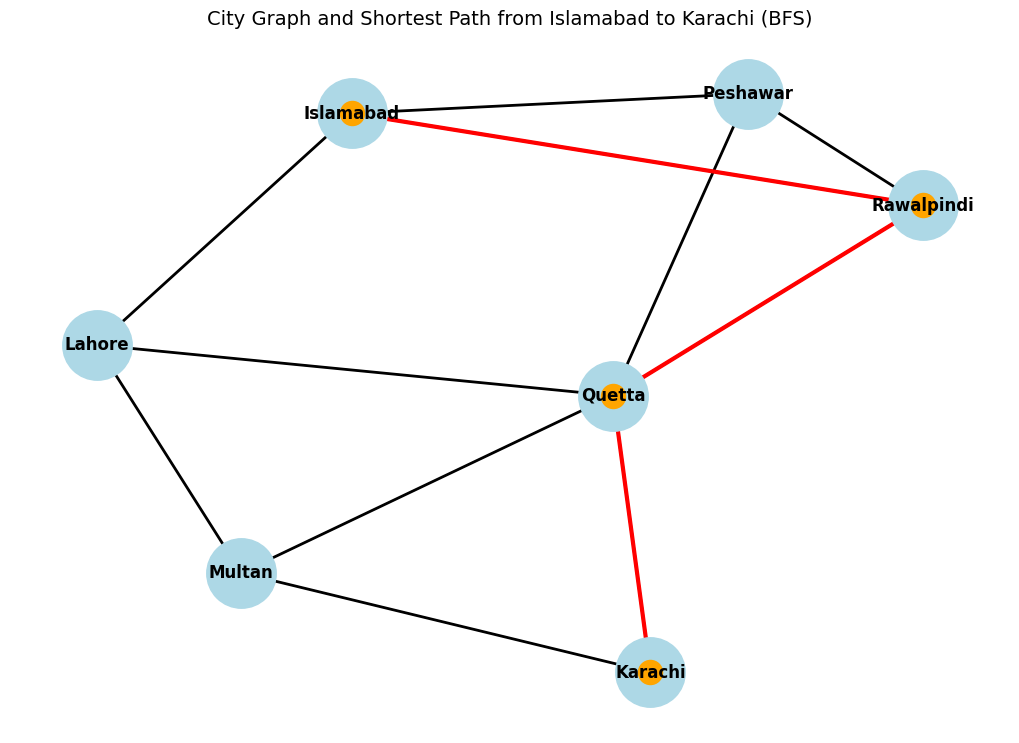

In [20]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph using adjacency list
graph = {
    "Islamabad": ["Rawalpindi", "Lahore", "Peshawar"],
    "Rawalpindi": ["Islamabad", "Peshawar", "Quetta"],
    "Peshawar": ["Islamabad", "Rawalpindi", "Quetta"],
    "Lahore": ["Islamabad", "Multan", "Quetta"],
    "Multan": ["Lahore", "Karachi", "Quetta"],
    "Quetta": ["Rawalpindi", "Peshawar", "Multan", "Karachi"],
    "Karachi": ["Multan", "Quetta"]
}

# BFS to find shortest path from source to destination
def bfs_shortest_path(graph, start, goal):
    visited = set()
    queue = deque([[start]])

    while queue:
        path = queue.popleft()
        city = path[-1]

        if city == goal:
            return path

        if city not in visited:
            visited.add(city)
            for neighbor in graph[city]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

    return None  # if no path found

# Run BFS to find shortest path from Islamabad to Karachi
start_city = "Islamabad"
end_city = "Karachi"
shortest_path = bfs_shortest_path(graph, start_city, end_city)

# Output results
if shortest_path:
    print(f"Shortest path from {start_city} to {end_city}:")
    print(" → ".join(shortest_path))
    print(f"Number of cities (including start and end): {len(shortest_path)}")
else:
    print("No path found between the cities.")

# Create the graph object
G = nx.Graph()

# Add edges to the graph based on connections
for city, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

# Define layout for visualization
pos = nx.spring_layout(G, seed=42)  # consistent layout

# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2500, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=2)

# Highlight the shortest path
if shortest_path:
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
    nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='orange')

plt.title("City Graph and Shortest Path from Islamabad to Karachi (BFS)", fontsize=14)
plt.axis('off')
plt.show()